In [13]:
import pandas as pd
import numpy as np

In [14]:
train_df = pd.read_csv('data/processed/train.csv')
test_df = pd.read_csv('data/processed/test.csv')
train_df.shape

(91466, 208)

In [15]:
from pycaret.classification import *

clf = setup(data = train_df, target = 'Response', 
            log_experiment = True, experiment_name = 'cross-sell', 
            fix_imbalance=True, silent=True, feature_selection=True)

,Description,Value
0,session_id,4582
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(91466, 208)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,204
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
from sklearn.metrics import log_loss
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target='pred_proba')

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f59744573a0>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [22]:

top5_models=compare_models(n_select = 5, sort = "logloss", include =['gbc', 'ada', 'lightgbm', 'lr', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8274,0.8468,0.4788,0.3515,0.4051,0.3070,0.3122,0.3073,10.0090
lightgbm,Light Gradient Boosting Machine,0.7961,0.8489,0.6355,0.3291,0.4336,0.3243,0.3505,0.3291,2.2560
gbc,Gradient Boosting Classifier,0.7310,0.8457,0.8582,0.2952,0.4393,0.3139,0.3914,0.4196,5.1420
lr,Logistic Regression,0.6972,0.8504,0.9279,0.2794,0.4294,0.2967,0.3959,0.4674,12.9760
ada,Ada Boost Classifier,0.7179,0.8457,0.8846,0.2885,0.4351,0.3067,0.3923,0.6607,2.9670


In [32]:

tuned_top5 = [
  tune_model(
    i,
    optimize="logloss",
    choose_better=True,
    early_stopping=True)
  for i in top5_models[0:1]
  ]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.8771,0.8481,0.0000,0.0000,0.0000,-0.0003,-0.0047,0.3106
1,0.8772,0.8473,0.0025,0.5000,0.0051,0.0038,0.0287,0.3139
2,0.8766,0.8517,0.0013,0.1667,0.0025,0.0007,0.0041,0.3077
3,0.8771,0.8499,0.0000,0.0000,0.0000,-0.0003,-0.0047,0.3079
4,0.8772,0.8440,0.0013,0.5000,0.0025,0.0019,0.0203,0.3094
5,0.8771,0.8487,0.0013,0.5000,0.0025,0.0019,0.0203,0.3055
6,0.8772,0.8454,0.0025,0.5000,0.0051,0.0038,0.0287,0.3126
7,0.8771,0.8370,0.0000,0.0000,0.0000,-0.0003,-0.0047,0.3186
8,0.8772,0.8586,0.0013,0.5000,0.0025,0.0019,0.0203,0.3032


In [33]:
top5_models[0]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=4582, reg_alpha=0, ...)

In [34]:
tuned_top5[0]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=4582, reg_alpha=0, ...)

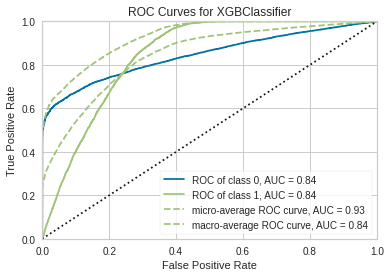

In [35]:
# check the residuals of trained model
plot_model(top5_models[0], 'auc')

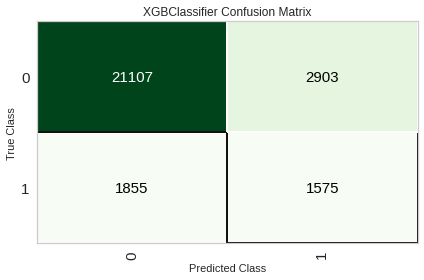

In [36]:
# check feature importance
plot_model(top5_models[0], plot = 'confusion_matrix')

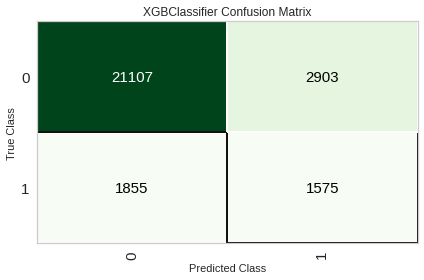

In [37]:
plot_model(tuned_top5[0], plot = 'confusion_matrix')

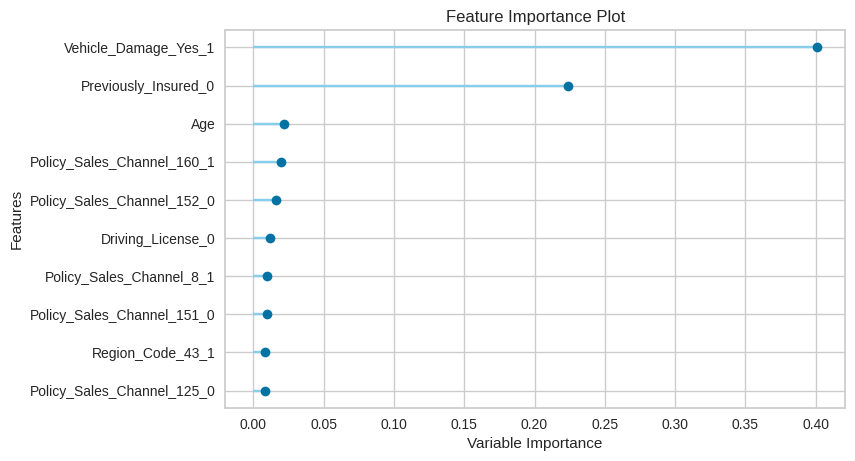

In [29]:
plot_model(top5_models[0], plot = 'feature')

In [12]:
# finalize the model
final_best = finalize_model(top5_models[0])
# save model to disk
save_model(final_best, 'model/cross-sale-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [30]:
result=pull()
print(result)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  LogLoss
Fold                                                                   
0       0.7304  0.8380  0.8677  0.2960  0.4414  0.3163  0.3958   0.6931
1       0.7325  0.8337  0.8473  0.2948  0.4374  0.3122  0.3871   0.6931
2       0.7253  0.8404  0.8766  0.2931  0.4393  0.3128  0.3953   0.6931
3       0.7265  0.8303  0.8639  0.2923  0.4368  0.3103  0.3898   0.6931
4       0.7262  0.8394  0.8562  0.2910  0.4343  0.3074  0.3855   0.6931
5       0.7251  0.8436  0.8780  0.2934  0.4398  0.3133  0.3961   0.6931
6       0.7182  0.8402  0.8601  0.2852  0.4284  0.2992  0.3795   0.6931
7       0.7246  0.8320  0.8524  0.2892  0.4318  0.3043  0.3818   0.6931
8       0.7259  0.8545  0.8804  0.2941  0.4409  0.3148  0.3980   0.6931
9       0.7201  0.8360  0.8601  0.2867  0.4300  0.3014  0.3814   0.6931
Mean    0.7255  0.8388  0.8643  0.2916  0.4360  0.3092  0.3890   0.6931
Std     0.0040  0.0065  0.0107  0.0034  0.0044  0.0056  0.0066  